# Clase Newton-Raphson ME3250


## Aplicación de cinemática inversa en un sistema de biela manivela 2D

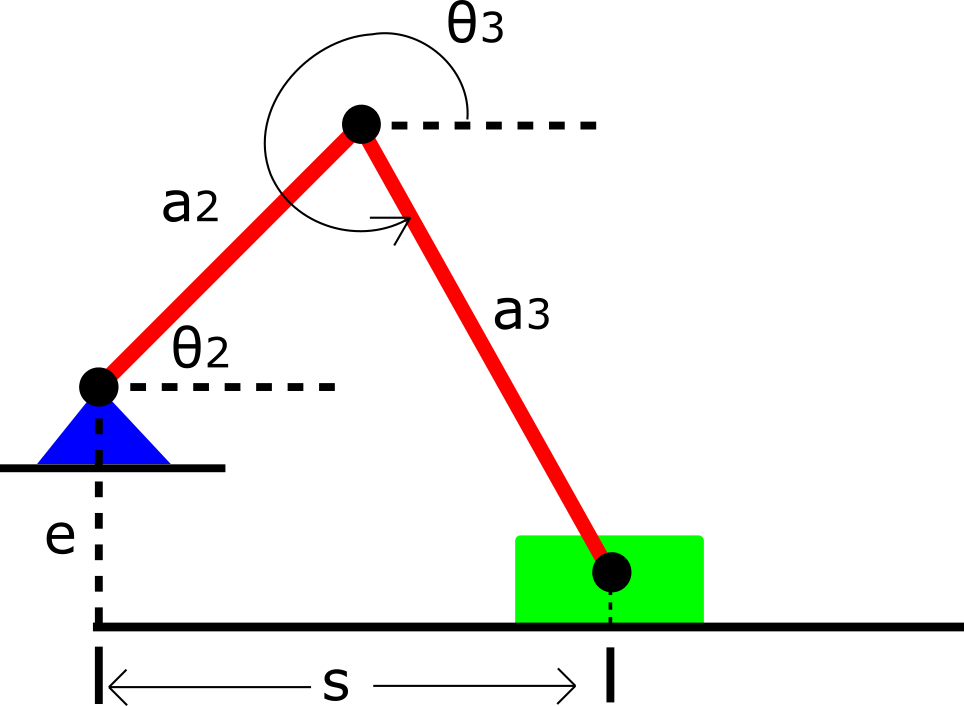

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [ ]:
#Datos (Problema de biela manivela)
e=0
a2=3
a3=4
O2= np.linspace(0,2*np.pi,100) #rango para angulo o2

#Guess inicial
x0=np.array([20*np.pi/180,5]) #o3 , s

#f(x), donde x[0] = o2, x[1] = o3, x[2] = s, e cte
# Se define la ecuacion de cierre en cada componente (x,y)
def f(x,e):
  f1= a2*np.cos(x[0])+a3*np.cos(x[1])-x[2]
  f2= a2*np.sin(x[0])+a3*np.sin(x[1])+e

  return np.array([f1,f2])

def J(x):
  return np.array([[-a3*np.sin(x[1]), -1],[a3*np.cos(x[1]), 0]])


In [ ]:
#Iteracion
sol_array=[]
for o2 in O2:
  g=np.array([1,1]) #solo para entrar al while
  while np.linalg.norm(g)>1e-8:
    o3= x0[0]
    s= x0[1]
    g = f(np.array([o2,o3,s]),e)
    Jac= J(np.array([o2,o3]))
    x0= x0-np.dot(np.linalg.inv(Jac),g)

    #evalua g con el X0 encontrado, se puede omitir si el error es despreciable en las ultimas iteraciones
    o3= x0[0]
    s= x0[1]
    g = f(np.array([o2,o3,s]),e)

  #every time got solution, save the x0 array
  sol_array.append(x0)


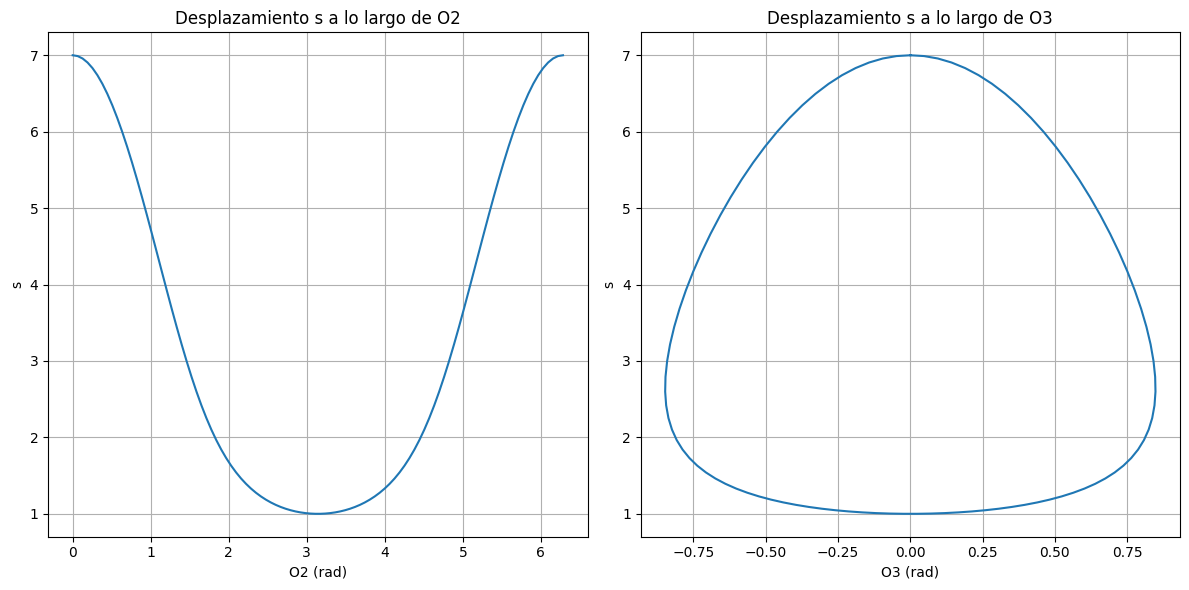

In [ ]:
sol_array_np = np.array(sol_array)
o2_values = O2
o3_values = sol_array_np[:, 0]
s_values = sol_array_np[:, 1]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(o2_values, s_values)
ax1.set_xlabel('O2 (rad)')
ax1.set_ylabel('s')
ax1.set_title('Desplazamiento s a lo largo de O2')
ax1.grid(True)


ax2.plot(o3_values, s_values)
ax2.set_xlabel('O3 (rad)')
ax2.set_ylabel('s')
ax2.set_title('Desplazamiento s a lo largo de O3')
ax2.grid(True)

plt.tight_layout()
plt.show()


### Sección de animación:
el mecanismo se dibuja nuevamente y se utilizan como input las soluciones obtenidas por el método NR.

In [ ]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim([-4, 8])
ax.set_ylim([-4, 4])
ax.set_aspect('equal')

# Initialize the plot elements
link1, = ax.plot([], [], 'r-', lw=2)
link2, = ax.plot([], [], 'b-', lw=2)
point_o2, = ax.plot([], [], 'go', markersize=8)
point_o3, = ax.plot([], [], 'ro', markersize=8)
point_slider, = ax.plot([], [], 'bo', markersize=8)

def init():
    link1.set_data([], [])
    link2.set_data([], [])
    point_o2.set_data([], [])
    point_o3.set_data([], [])
    point_slider.set_data([], [])
    return link1, link2, point_o2, point_o3, point_slider

def animate(i):
    o2 = o2_values[i]
    o3 = o3_values[i]
    #Punto inicial (origen)
    x_o2 = 0
    y_o2 = 0
    #Extremo eslabon 1
    x_o3 = a2 * np.cos(o2)
    y_o3 = a2 * np.sin(o2)
    #Extremo eslabon 2
    x_slider = x_o3 + a3 * np.cos(o3)
    y_slider = y_o3 + a3 * np.sin(o3)

    link1.set_data([x_o2, x_o3], [y_o2, y_o3])
    link2.set_data([x_o3, x_slider], [y_o3, y_slider])
    point_o2.set_data([x_o2], [y_o2])
    point_o3.set_data([x_o3], [y_o3])
    point_slider.set_data([x_slider], [y_slider])

    return link1, link2, point_o2, point_o3, point_slider

ani = animation.FuncAnimation(fig, animate, frames=len(o2_values), init_func=init, blit=True, interval=20)

plt.close(fig)  # Prevent the plot from being displayed inline
HTML(ani.to_jshtml())
